## 提取话题

In [1]:
!pip install wordcloud
!pip install jieba

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


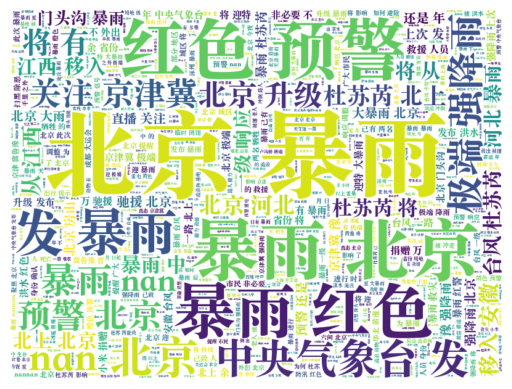

In [24]:
import pandas as pd
from wordcloud import WordCloud
import jieba
import matplotlib.pyplot as plt

# 读取微博数据
df = pd.read_excel('data.xlsx')

# 提取话题内容并进行分词
topics = ' '.join(jieba.cut(''.join(df.iloc[1:, 10].astype(str))))

# 创建词云对象
wordcloud = WordCloud(font_path='./Songti.ttc', background_color='white', max_words=2000, stopwords=set(), width=800, height=600)

# 生成词云
wordcloud.generate(topics)

# 显示词云
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# 另存词云图片至同一文件夹
file_name = "wordcloud_image.png"
plt.savefig(file_name, dpi=300)

### trend：北京暴雨；红色预警；极端强降雨；中央气象台发；京津冀

## 提取高转发话题

In [18]:
# 读取Excel文件
data = pd.read_excel(r"./data.xlsx")

# 将第12列转换为整数类型
data['forward_count'] = data.iloc[1:, 11].astype(int)

# 定义区间
bins = [0, 100, 500, 1000, float('inf')]

# 统计各区间内的样本个数
label_counts = pd.cut(data['forward_count'], bins=bins, include_lowest=True, right=False).value_counts().sort_index()

# 打印结果
print("不同转发量区间样本个数统计：")
for index, count in label_counts.items():
    if str(index.right) == 'inf':
        print(f"[{int(index.left)}, ∞): {count}")
    else:
        print(f"[{int(index.left)}, {int(index.right)}): {count}")

不同转发量区间样本个数统计：
[0, 100): 9606
[100, 500): 62
[500, 1000): 4
[1000, ∞): 10


## 根据统计结果，提取转发量100以上话题

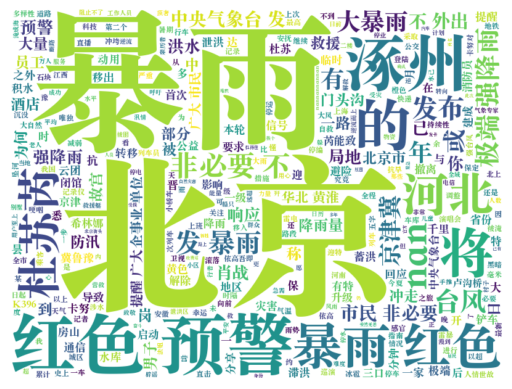

In [26]:
# 读取Excel文件
data = pd.read_excel(r"./data.xlsx")

# 确定转发数和话题列的名称
forward_count_col = '转发数'  # 替换为实际的转发数列名
topic_col = '话题'  # 替换为实际的话题列名

# 筛选出转发数大于100的行
filtered_data = data[data[forward_count_col] > 100]

# 提取话题内容并进行分词
topics = ' '.join(jieba.cut(''.join(filtered_data[topic_col].astype(str))))

# 创建词云对象
wordcloud = WordCloud(font_path='./Songti.ttc', background_color='white', max_words=2000, stopwords=set(), width=800, height=600)

# 生成词云
wordcloud.generate(topics)

# 显示词云
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# 另存词云图片至同一文件夹
file_name = "wordcloud_image_hightrans.png"
plt.savefig(file_name, dpi=300)

# 显示图像
plt.show()

### high_trans_trend：北京；暴雨；红色预警；涿州；河北；杜苏芮

### 分析：全话题提取中关键词更关注事件，即北京暴雨红色预警本身；高转发量话题提取中关键词出现事件原因，即河北涿州台风“杜苏芮”引起北京暴雨

## 分析不同类型用户被转发的趋势

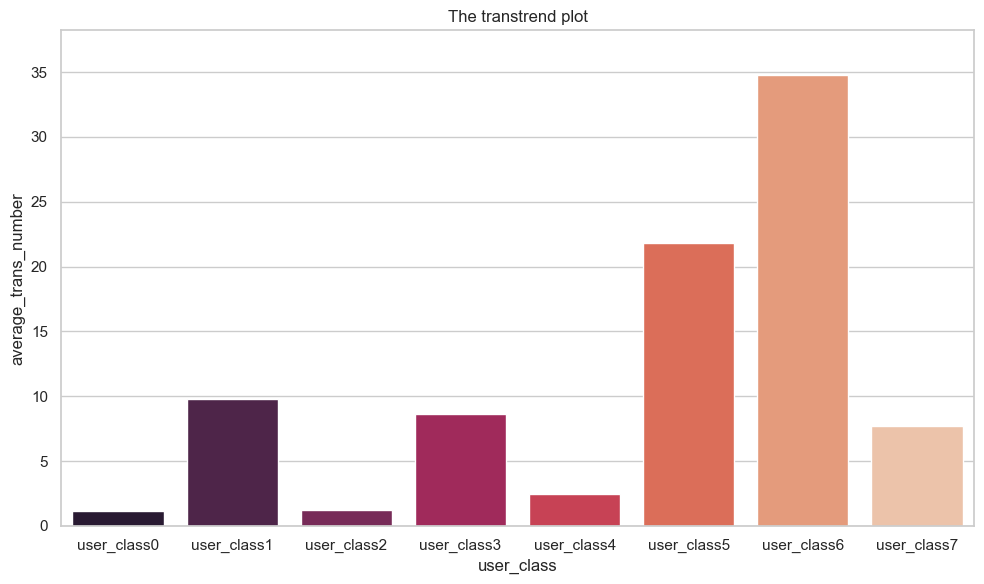

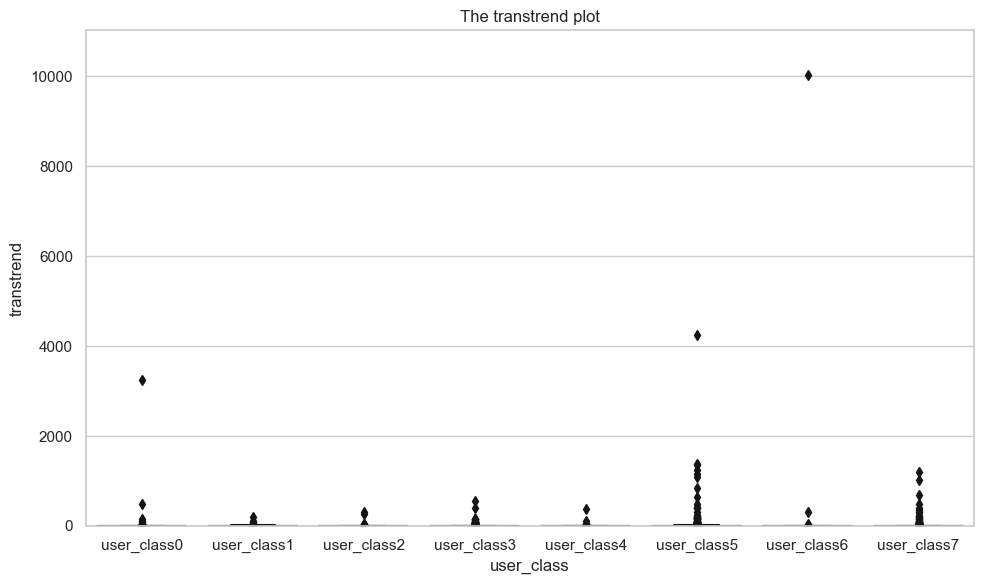

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置Seaborn样式为"whitegrid"
sns.set(style="whitegrid")

# 读取Excel文件
data = pd.read_excel(r"./data.xlsx")

# 确定用户类型和转发数列的名称
user_class_col = 'user_class'  # 替换为实际的用户类型列名
forward_count_col = '转发数'  # 替换为实际的转发数列名

# 提取用户类型和转发数列
user_classes = data[user_class_col]
forward_counts = data[forward_count_col]

# 计算每种用户类型的平均转发数
user_type_avg_forward = data.groupby(user_class_col)[forward_count_col].mean()

# 绘制条形图展示不同用户类型的平均转发数
plt.figure(figsize=(10, 6))
sns.barplot(x=user_type_avg_forward.index, y=user_type_avg_forward.values, palette="rocket")
plt.xlabel("user_class")
plt.ylabel("average_trans_number")
plt.title("The transtrend plot")
plt.xticks(ticks=range(8), labels=["user_class{}".format(i) for i in range(8)])
plt.ylim(0, max(user_type_avg_forward.values) * 1.1)  # 调整y轴范围
plt.tight_layout()
plt.show()

# 绘制箱形图比较不同用户类型的转发数量分布
plt.figure(figsize=(10, 6))
sns.boxplot(x=user_classes, y=forward_counts, palette="mako_r")
plt.xlabel("user_class")
plt.ylabel("transtrend")
plt.title("The transtrend plot")
plt.xticks(ticks=range(8), labels=["user_class{}".format(i) for i in range(8)])
plt.ylim(0, max(forward_counts) * 1.1)  # 调整y轴范围
plt.tight_layout()
plt.show()

### 转发趋势最高的用户类型为高度活跃官方账号（user_class6），其次是高度活跃大V（user_class5）
### 低活跃度大V（user_class1）低活跃度官方大V（user_class3）高活跃度官方大V（user_class7）也有一定关注度
### 普通账户（user_class0&4）和低活跃度官方账号（user_class2）关注度低